In [1]:
import numpy as np
import pandas as pd


import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow.keras.layers import Dense, Convolution2D
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.nn import softmax
from tensorflow.keras.regularizers import Regularizer,L2
from tensorflow.keras import regularizers
from tensorflow.keras import datasets, layers, models





import logging
from autils import *


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from xgboost import XGBClassifier


In [2]:
df  = pd.read_csv('./train.csv')

In [3]:
df.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

In [4]:
x , y = df.iloc[:,1:],df[['label']]

<a name="toc_89367_2.2.1"></a>
#### 2.2.1 View the variables
Let's get more familiar with your dataset.  
- A good place to start is to print out each variable and see what it contains.

The code below prints elements of the variables `X` and `y`.  

In [5]:
print('The first elemant is :',x.iloc[0])

The first elemant is : pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 784, dtype: int64


In [6]:
print ('The first element of y is: ', y.iloc[0])
print ('The last element of y is: ', y.iloc[-1])

The first element of y is:  label    1
Name: 0, dtype: int64
The last element of y is:  label    9
Name: 41999, dtype: int64


<a name="toc_89367_2.2.2"></a>
#### 2.2.2 Check the dimensions of your variables

Another way to get familiar with your data is to view its dimensions. Please print the shape of `X` and `y` and see how many training examples you have in your dataset.

In [7]:
print ('The shape of X is: ' + str(x.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (42000, 784)
The shape of y is: (42000, 1)


<a name="toc_89367_2.2.3"></a>
#### 2.2.3 Visualizing the Data

You will begin by visualizing a subset of the training set. 
- In the cell below, the code randomly selects 64 rows from `X`, maps each row back to a 20 pixel by 20 pixel grayscale image and displays the images together. 
- The label for each image is displayed above the image 

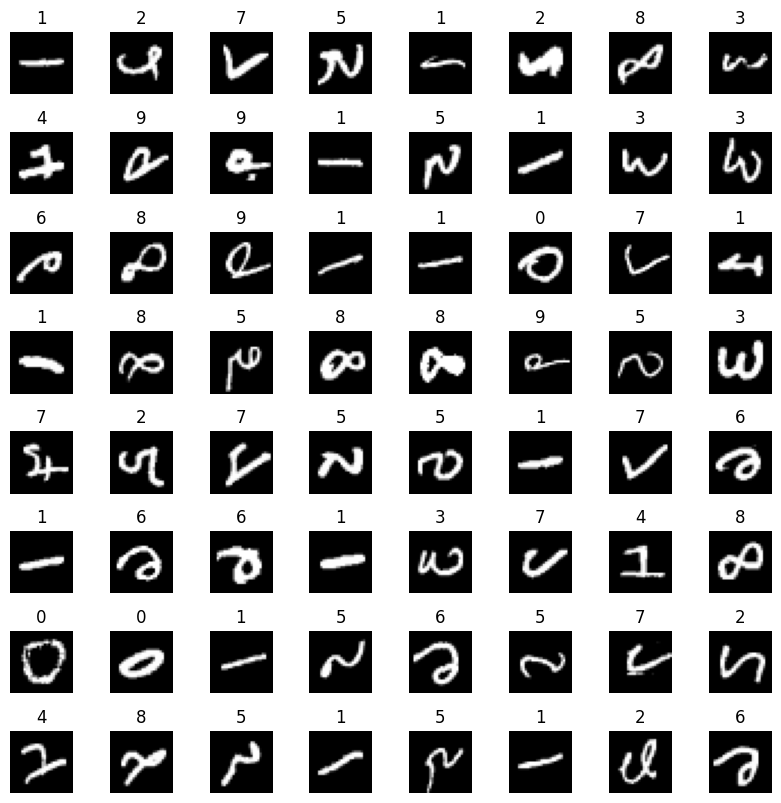

In [8]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  

m, n = x.shape  

fig, axes = plt.subplots(8, 8, figsize=(8, 8))  
fig.tight_layout(pad=0.1)  

for i, ax in enumerate(axes.flat):  
    # Select random indices  
    random_index = np.random.randint(m)  
    
    # Select rows corresponding to the random indices and  
    # reshape the image  
    X_random_reshaped = np.array(x.iloc[random_index]).reshape((28, 28)).T  
    
    # Display the image  
    ax.imshow(X_random_reshaped, cmap='gray')  
    
    # Display the label above the image  
    ax.set_title(y.iloc[random_index,0])  
    ax.axis('off')  # Use ax.axis('off') instead of ax.set_axis_off()  

plt.show()  # Ensure to display the plot  

In [9]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.40, random_state=42)

In [10]:
print(f'train samples: {len(X_train)}')
print(f'validation samples: {len(X_test)}')
# print(f'target proportion: {np.sum(y_train)/len(y_train)}')

train samples: 25200
validation samples: 16800


<a name="2.3"></a>
### 2.3 Model representation
/
The neural network you will use in this assignment is shown in the figure below. 
- This has three dense layers with sigmoid activations.
    - Recall that our inputs are pixel values of digit images.
    - Since the images are of size $20\times20$, this gives us $400$ inputs  
    


- The parameters have dimensions that are sized for a neural network with $25$ units in layer 1, $15$ units in layer 2 and $1$ output unit in layer 3. 

    - Recall that the dimensions of these parameters are determined as follows:
        - If network has $s_{in}$ units in a layer and $s_{out}$ units in the next layer, then 
            - $W$ will be of dimension $s_{in} \times s_{out}$.
            - $b$ will a vector with $s_{out}$ elements
  
    - Therefore, the shapes of `W`, and `b`,  are 
        - layer1: The shape of `W1` is (m, 50) and the shape of `b1` is (50,)
        - layer2: The shape of `W2` is (50, 20) and the shape of `b2` is: (20,)
        - layer3: The shape of `W3` is (20, 1) and the shape of `b3` is: (1,)
>**Note:** The bias vector `b` could be represented as a 1-D (n,) or 2-D (1,n) array. Tensorflow utilizes a 1-D representation and this lab will maintain that convention. 
               

<a name="2.4"></a>
### 2.4 Tensorflow Model Implementation


Tensorflow models are built layer by layer. A layer's input dimensions ($s_{in}$ above) are calculated for you. You specify a layer's *output dimensions* and this determines the next layer's input dimension. The input dimension of the first layer is derived from the size of the input data specified in the `model.fit` statement below. 
>**Note:** It is also possible to add an input layer that specifies the input dimension of the first layer. For example:  
`tf.keras.Input(shape=(m,)),    #specify input shape`  
We will include that here to illuminate some model sizing.

In [11]:
# UNQ_C2
# GRADED CELL: Sequential model
tf.random.set_seed(1234) # for consistent results
model = Sequential(
    [               
        ### START CODE HERE ### 
        Dense(units=75,activation="relu"),
        Dense(units=50,activation="relu"),
        Dense(units=25,activation="relu"),
        Dense(units=15,activation="relu"),
        Dense(units=10,activation="linear")
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)


In [12]:
model.compile(optimizer=Adam(learning_rate=.001),loss=SparseCategoricalCrossentropy(from_logits=True))
model.fit(X_train,y_train,epochs=100)


Epoch 1/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 3.8583
Epoch 2/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.5096
Epoch 3/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.3069
Epoch 4/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2228
Epoch 5/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1957
Epoch 6/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1799
Epoch 7/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1437
Epoch 8/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1285
Epoch 9/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1165
Epoch 10/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1153
Epoch 11/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0995
Epoch 12/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0983
Epoch 13/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0918
Epoch 14/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0756
Epoch 15/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 4

In [13]:
# Predicting for the entire test set
logits = model.predict(X_train)  # X_test is the entire test dataset

# Apply softmax to convert logits to probabilities
predictions = tf.nn.softmax(logits)

# Get the predicted class for each example in the test set
predicted_classes = np.argmax(predictions, axis=1)


# Print predicted classes
print(f"Predicted classes: {predicted_classes}")


788/788 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted classes: [5 7 9 ... 2 6 0]



history = model.fit(
    X_train,y_train,
    epochs=40
)

In [14]:
# Predicting for the entire test set
logits_pre = model.predict(X_test)  # X_test is the entire test dataset

# Apply softmax to convert logits to probabilities
predictions_test = tf.nn.softmax(logits_pre)

# Get the predicted class for each example in the test set
predicted_classes_test = np.argmax(predictions_test, axis=1)


# Print predicted classes
print(f"Predicted classes: {predicted_classes_test}")


525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted classes: [8 1 9 ... 1 1 1]


In [15]:
train_error = accuracy_score(y_train,predicted_classes)
print(train_error)


0.9986507936507937


In [16]:
test_error = accuracy_score(y_test,predicted_classes_test)
print(test_error)

0.9658333333333333


<a name="3"></a>
### 3 Tensorflow Model Implementation with more hidden layers and regularizer



In [17]:
# UNQ_C2
# GRADED CELL: Sequential model
tf.random.set_seed(1234) # for consistent results
model_reg = Sequential(
    [               
        ### START CODE HERE ### 
        Dense(units=100,activation="relu",kernel_regularizer=regularizers.L2(1e-4)),
        Dense(units=75,activation="relu",kernel_regularizer=regularizers.L2(1e-4)),
        Dense(units=50,activation="relu",kernel_regularizer=regularizers.L2(1e-3)),
        Dense(units=25,activation="relu",kernel_regularizer=regularizers.L2(1e-3)),
        Dense(units=15,activation="relu",kernel_regularizer=regularizers.L2(1e-2)),
        Dense(units=10,activation="linear")
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)


In [18]:
model_reg.compile(optimizer=Adam(learning_rate=.001),loss=SparseCategoricalCrossentropy(from_logits=True))
model_reg.fit(X_train,y_train,epochs=100)


Epoch 1/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 2.4686
Epoch 2/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.5956
Epoch 3/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.4025
Epoch 4/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3186
Epoch 5/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2575
Epoch 6/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.2166
Epoch 7/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1820
Epoch 8/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1738
Epoch 9/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1574
Epoch 10/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1555
Epoch 11/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1312
Epoch 12/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1241
Epoch 13/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.1254
Epoch 14/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1084
Epoch 15/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 5

In [19]:
# Predicting for the entire test set
logits_reg = model_reg.predict(X_train)  # X_test is the entire test dataset

# Apply softmax to convert logits to probabilities
predictions_reg = tf.nn.softmax(logits_reg)

# Get the predicted class for each example in the test set
predicted_classes_reg = np.argmax(predictions_reg, axis=1)


# Print predicted classes
print(f"Predicted classes: {predicted_classes_reg}")


788/788 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted classes: [5 7 9 ... 2 6 0]


In [20]:
# Predicting for the entire test set
logits_reg_pre = model_reg.predict(X_test)  # X_test is the entire test dataset

# Apply softmax to convert logits to probabilities
predictions_reg_test = tf.nn.softmax(logits_reg_pre)

# Get the predicted class for each example in the test set
predicted_classes_reg_test = np.argmax(predictions_reg_test, axis=1)


# Print predicted classes
print(f"Predicted classes: {predicted_classes_reg_test}")


525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted classes: [8 1 9 ... 1 1 1]


In [21]:
train_reg_error = accuracy_score(y_train,predicted_classes)
print(train_error)


0.9986507936507937


In [22]:
test_reg_error = accuracy_score(y_test,predicted_classes_reg_test)
print(test_reg_error)

0.9567261904761905


In [23]:
test_data = pd.read_csv("./test.csv")

In [24]:
test_data.shape

(28000, 784)

In [25]:
# Predicting for the entire test set
logits_final_reg = model.predict(test_data)  # X_test is the entire test dataset

# Apply softmax to convert logits to probabilities
predictions_final_reg = tf.nn.softmax(logits_final_reg)

# Get the predicted class for each example in the test set
predicted_classes_final_reg = np.argmax(predictions_final_reg, axis=1)


# Print predicted classes
print(f"Predicted classes: {predicted_classes_final_reg}")


875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted classes: [2 0 9 ... 3 9 2]


In [26]:
predicted_classes_final_reg = pd.Series(predicted_classes_final_reg)

In [27]:
predicted_classes_final_reg.index = range(1, len(test_data) + 1) # Set the index of predictions to match test_data index
predicted_classes_final_reg.index.name = 'ImageId'   # Name the index column as 'ImageId'

# Save to CSV with the index as 'ImageId' and no separate column for index
predicted_classes_final_reg.to_csv('mysubmission_reg.csv', header=['Label'])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━

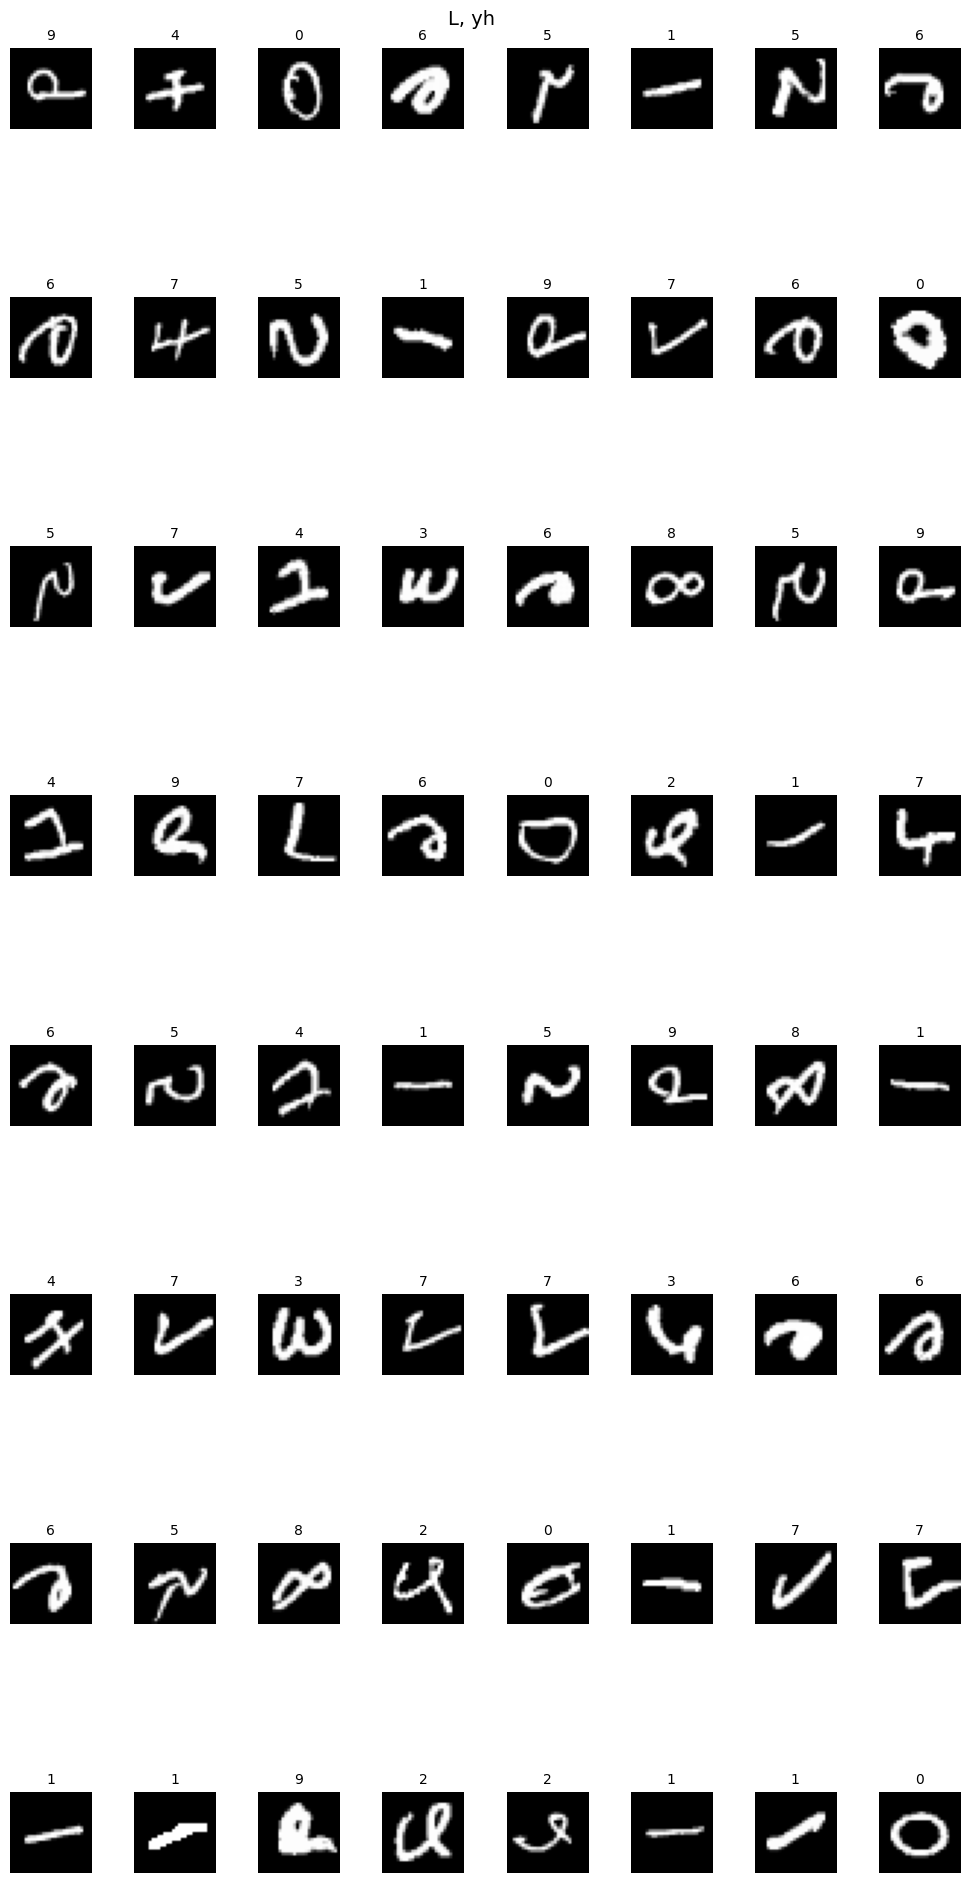

In [28]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  
# You do not need to modify anything in this cell  

m, n = test_data.shape  # Make sure to use X_test instead of x  

fig, axes = plt.subplots(8, 8, figsize=(10, 20))  # Increase figsize for better visibility  
fig.tight_layout(pad=0.5)  # Adjust padding for better spacing between subplots  

for i, ax in enumerate(axes.flat):  
    # Select random indices  
    random_index = np.random.randint(m)  
    
    # Select rows corresponding to the random indices and reshape the image  
    X_random_reshaped = np.array(test_data.iloc[random_index]).reshape((28, 28)).T  
    
    # Display the image  
    ax.imshow(X_random_reshaped, cmap='gray')  
    
    # Predict using the Neural Network  
    prediction = model.predict(np.array([test_data.iloc[random_index]]))  # Added list brackets for a single sample  
    prediction_p = tf.nn.softmax(prediction).numpy()  # Convert to numpy array  
    
    yhat = np.argmax(prediction_p)  

    # Display the label above the image  
    ax.set_title(f"{yhat}", fontsize=10)  
    ax.set_axis_off()  

fig.suptitle("L, yh", fontsize=14)  
plt.show()  

<a name="3"></a>
### 4 Tensorflow Model Implementation with more hidden layers and regularizer



tf.random.set_seed(1234)
lambdas = [0.0, 0.0001, 0.001, 0.01]
models_reg_test=[None] * len(lambdas)

train_test_accuracy = [None]*len(lambdas)



from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
        )



for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models_reg_test[i] =  Sequential(
        [
            Dense(units=100,activation="relu",kernel_regularizer=regularizers.L2(lambda_*10)),
            Dense(units=75,activation="relu",kernel_regularizer=regularizers.L2(lambda_*5)),
            Dense(units=50,activation="relu",kernel_regularizer=regularizers.L2(lambda_*3)),
            Dense(units=25,activation="relu",kernel_regularizer=regularizers.L2(lambda_*2)),
            Dense(units=15,activation="relu",kernel_regularizer=regularizers.L2(lambda_*1.5)),
            Dense(units=10,activation="linear")       ]
    )
    models_reg_test[i].compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=tf.keras.optimizers.Adam(0.0001),
    )

    models_reg_test[i].fit(
        X_train,y_train,
        epochs=100,
        validation_data=(X_test, y_test), 
        callbacks=[early_stopping]
    )
    print(f"\n\nFinished lambda = {lambda_}")


    # Predicting for the training set
    logits_reg_train = models_reg_test[i].predict(X_train)
    predictions_reg_train = tf.nn.softmax(logits_reg_train)
    predicted_classes_train = np.argmax(predictions_reg_train, axis=1)
    
    # Predicting for the test set
    logits_reg_test = models_reg_test[i].predict(X_test)
    predictions_reg_test = tf.nn.softmax(logits_reg_test)
    predicted_classes_test = np.argmax(predictions_reg_test, axis=1)
    
    # Calculate accuracy for train and test data
    train_accuracy = accuracy_score(y_train, predicted_classes_train)
    test_accuracy = accuracy_score(y_test, predicted_classes_test)
    
    print(f"Train data accuracy: {train_accuracy}")
    print(f"Test data accuracy: {test_accuracy}")

    train_test_accuracy[i] = (train_accuracy, test_accuracy)
    






In [29]:
model_reg = Sequential(
    [               
        ### START CODE HERE ### 
        Dense(units=200,activation="relu",kernel_regularizer=regularizers.L2(1e-4)),
        Dense(units=100,activation="relu",kernel_regularizer=regularizers.L2(1e-4)),
        Dense(units=75,activation="relu",kernel_regularizer=regularizers.L2(1e-3)),
        Dense(units=50,activation="relu",kernel_regularizer=regularizers.L2(1e-3)),
        Dense(units=50,activation="relu",kernel_regularizer=regularizers.L2(1e-3)),
        Dense(units=25,activation="relu",kernel_regularizer=regularizers.L2(1e-2)),
        Dense(units=15,activation="relu",kernel_regularizer=regularizers.L2(1e-2)),
        Dense(units=10,activation="linear")
        
        ### END CODE HERE ### 
    ], name = "my_model" 
)


In [30]:
model_reg.compile(optimizer=Adam(learning_rate=.0001),loss=SparseCategoricalCrossentropy(from_logits=True))
model_reg.fit(X_train,y_train,epochs=100)


Epoch 1/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - loss: 4.5079
Epoch 2/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 1.4609
Epoch 3/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1.0744
Epoch 4/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.8877
Epoch 5/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.7632
Epoch 6/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 0.6686
Epoch 7/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.5983
Epoch 8/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - loss: 0.5362
Epoch 9/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.4926
Epoch 10/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.4513
Epoch 11/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.4139
Epoch 12/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3835
Epoch 13/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3587
Epoch 14/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 0.3383
Epoch 15/100
788/788 ━━━━━━━━━━━━━━━━━━━━ 5

In [31]:
# Predicting for the entire test set
logits_reg = model_reg.predict(X_train)  # X_test is the entire test dataset

# Apply softmax to convert logits to probabilities
predictions_reg = tf.nn.softmax(logits_reg)

# Get the predicted class for each example in the test set
predicted_classes_reg = np.argmax(predictions_reg, axis=1)


# Print predicted classes
print(f"Predicted classes: {predicted_classes_reg}")


788/788 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Predicted classes: [5 7 9 ... 2 6 0]


In [32]:
# Predicting for the entire test set
logits_reg_pre = model_reg.predict(X_test)  # X_test is the entire test dataset

# Apply softmax to convert logits to probabilities
predictions_reg_test = tf.nn.softmax(logits_reg_pre)

# Get the predicted class for each example in the test set
predicted_classes_reg_test = np.argmax(predictions_reg_test, axis=1)


# Print predicted classes
print(f"Predicted classes: {predicted_classes_reg_test}")


525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted classes: [8 1 9 ... 1 1 1]


In [33]:
train_reg_error = accuracy_score(y_train,predicted_classes)
print(train_error)


0.9986507936507937


In [34]:
test_reg_error = accuracy_score(y_test,predicted_classes_reg_test)
print(test_reg_error)

0.9705952380952381


In [35]:
test_data = pd.read_csv("./test.csv")

In [36]:
# Predicting for the entire test set
logits_final_reg = model.predict(test_data)  # X_test is the entire test dataset

# Apply softmax to convert logits to probabilities
predictions_final_reg = tf.nn.softmax(logits_final_reg)

# Get the predicted class for each example in the test set
predicted_classes_final_reg = np.argmax(predictions_final_reg, axis=1)


# Print predicted classes
print(f"Predicted classes: {predicted_classes_final_reg}")


875/875 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted classes: [2 0 9 ... 3 9 2]


In [37]:
predicted_classes_final_reg = pd.Series(predicted_classes_final_reg)

In [38]:
predicted_classes_final_reg.index = range(1, len(test_data) + 1) # Set the index of predictions to match test_data index
predicted_classes_final_reg.index.name = 'ImageId'   # Name the index column as 'ImageId'

# Save to CSV with the index as 'ImageId' and no separate column for index
predicted_classes_final_reg.to_csv('mysubmission_reg2.csv', header=['Label'])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

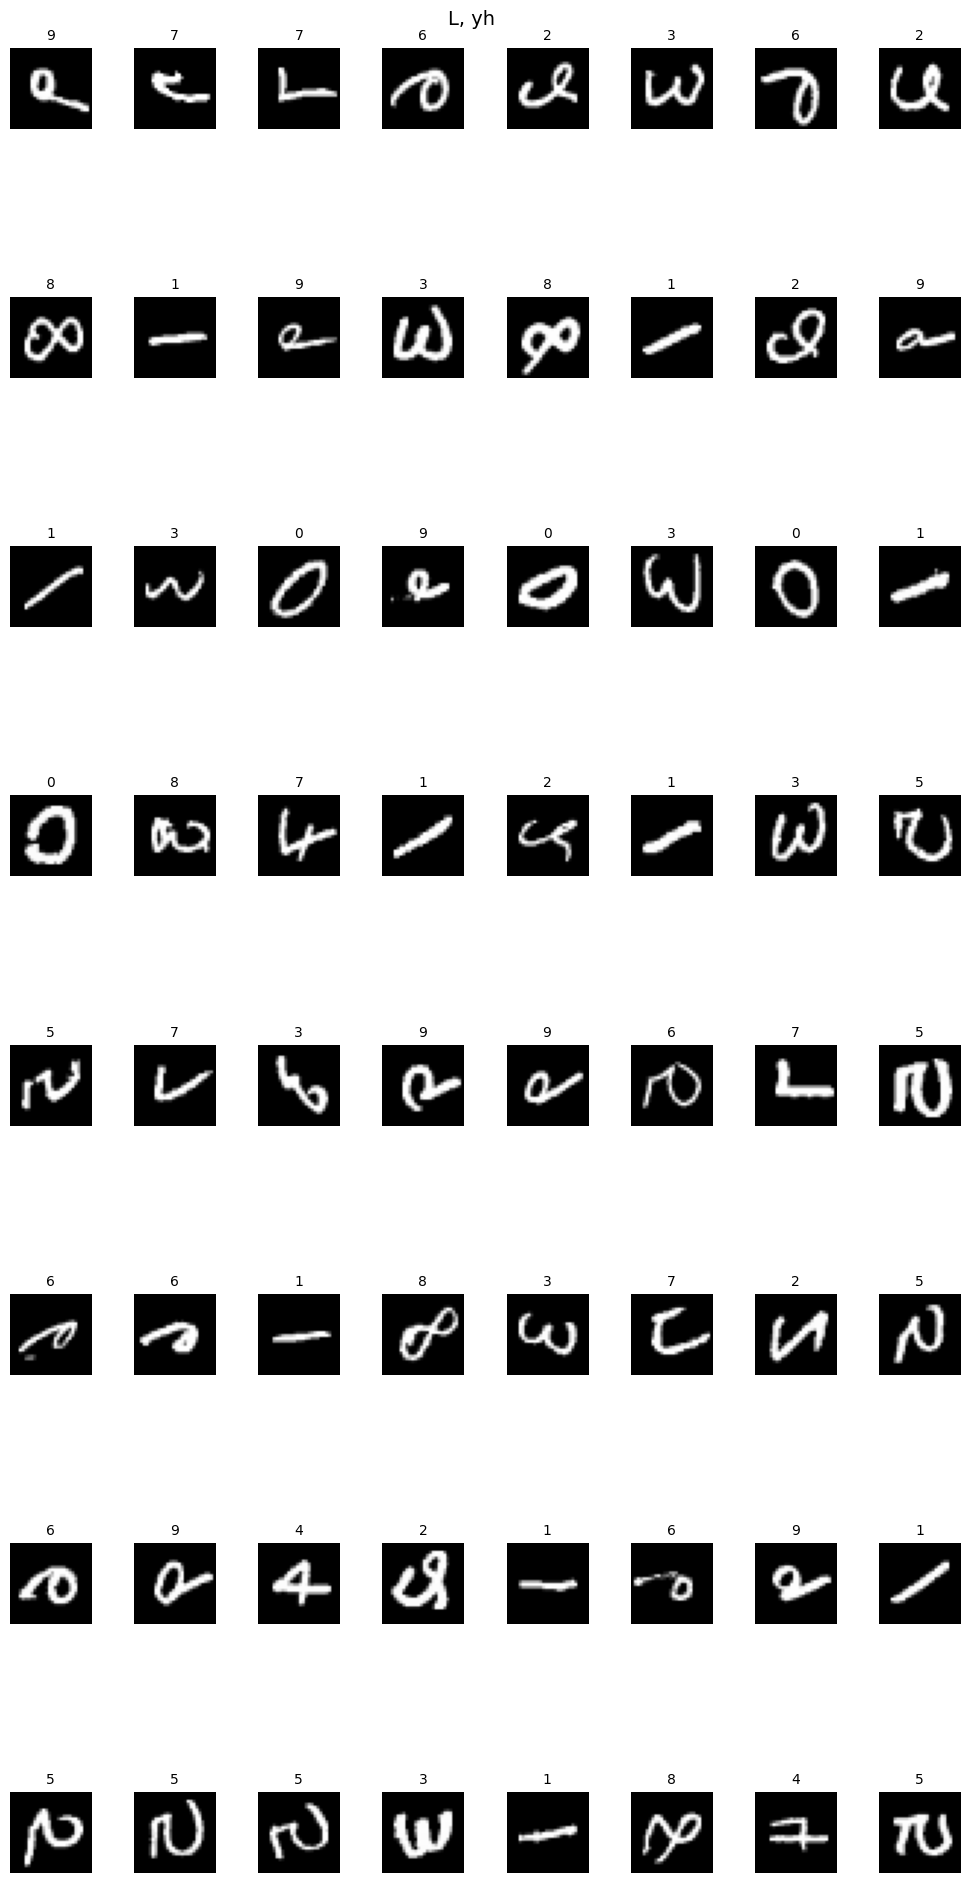

In [39]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  
# You do not need to modify anything in this cell  

m, n = test_data.shape  # Make sure to use X_test instead of x  

fig, axes = plt.subplots(8, 8, figsize=(10, 20))  # Increase figsize for better visibility  
fig.tight_layout(pad=0.5)  # Adjust padding for better spacing between subplots  

for i, ax in enumerate(axes.flat):  
    # Select random indices  
    random_index = np.random.randint(m)  
    
    # Select rows corresponding to the random indices and reshape the image  
    X_random_reshaped = np.array(test_data.iloc[random_index]).reshape((28, 28)).T  
    
    # Display the image  
    ax.imshow(X_random_reshaped, cmap='gray')  
    
    # Predict using the Neural Network  
    prediction = model.predict(np.array([test_data.iloc[random_index]]))  # Added list brackets for a single sample  
    prediction_p = tf.nn.softmax(prediction).numpy()  # Convert to numpy array  
    
    yhat = np.argmax(prediction_p)  

    # Display the label above the image  
    ax.set_title(f"{yhat}", fontsize=10)  
    ax.set_axis_off()  

fig.suptitle("L, yh", fontsize=14)  
plt.show()  

In [40]:
n = int(len(X_test)*0.5)

In [41]:
X_test_fit, X_cv_eval, y_test_fit, y_cv_eval = X_test[:n], X_test[n:], y_test[:n], y_test[n:]

In [42]:
xgb_model = XGBClassifier(n_estimators = 500, learning_rate = 0.1,verbosity = 1, random_state =42)
xgb_model.fit(X_train,y_train, eval_set = [(X_cv_eval,y_cv_eval)])

[0]	validation_0-mlogloss:1.97188
[1]	validation_0-mlogloss:1.74481
[2]	validation_0-mlogloss:1.56688
[3]	validation_0-mlogloss:1.42332
[4]	validation_0-mlogloss:1.30418
[5]	validation_0-mlogloss:1.19967
[6]	validation_0-mlogloss:1.11003
[7]	validation_0-mlogloss:1.02994
[8]	validation_0-mlogloss:0.95956
[9]	validation_0-mlogloss:0.89739
[10]	validation_0-mlogloss:0.84134
[11]	validation_0-mlogloss:0.79023
[12]	validation_0-mlogloss:0.74463
[13]	validation_0-mlogloss:0.70189
[14]	validation_0-mlogloss:0.66349
[15]	validation_0-mlogloss:0.62758
[16]	validation_0-mlogloss:0.59456
[17]	validation_0-mlogloss:0.56473
[18]	validation_0-mlogloss:0.53731
[19]	validation_0-mlogloss:0.51166
[20]	validation_0-mlogloss:0.48812
[21]	validation_0-mlogloss:0.46612
[22]	validation_0-mlogloss:0.44570
[23]	validation_0-mlogloss:0.42728
[24]	validation_0-mlogloss:0.40986
[25]	validation_0-mlogloss:0.39359
[26]	validation_0-mlogloss:0.37846
[27]	validation_0-mlogloss:0.36424
[28]	validation_0-mlogloss:0.3

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [43]:
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb_model.predict(X_test_fit),y_test_fit):.4f}")

Metrics train:
	Accuracy score: 1.0000
Metrics test:
	Accuracy score: 0.9705


In [44]:
prediction_xgbC = xgb_model.predict(test_data)
prediction_xgbC = pd.Series(prediction_xgbC)
prediction_xgbC.index = range(1, len(test_data) + 1) # Set the index of predictions to match test_data index
prediction_xgbC.index.name = 'ImageId'   # Name the index column as 'ImageId'

# Save to CSV with the index as 'ImageId' and no separate column for index
prediction_xgbC.to_csv('pred_xgbC.csv', header=['Label'])


In [45]:
X_train = np.array(X_train).reshape(-1, 28, 28, 1)
X_cv_eval = np.array(X_cv_eval).reshape(-1, 28, 28, 1)
X_test_fit = np.array(X_test_fit).reshape(-1, 28, 28, 1)
test_data = np.array(test_data).reshape(-1, 28, 28, 1)

<a name="5"></a>
### 5 Tensorflow Model Implementation with more hidden layers and regularizer



In [46]:
model_convo = models.Sequential([
    # First convolutional layer: 32 filters, 3x3 window, 'relu' activation
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    
    # First max-pooling layer: reduces size by taking the max in 2x2 blocks
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer: 64 filters, 3x3 window, 'relu' activation
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Second max-pooling layer
    layers.MaxPooling2D((2, 2)),

    # Flatten the output from convolutional layers (convert 2D to 1D)
    layers.Flatten(),

    # Dense layer: 64 neurons
    layers.Dense(64, activation='relu'),

    # Output layer: 10 neurons for the 10 digit classes (0-9), softmax activation for classification
    layers.Dense(10, activation='linear')
])


C:\Users\Harshit gupta\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model_convo.compile(optimizer=Adam(learning_rate=.0001),loss=SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model_convo.fit(X_train,y_train,epochs=100,batch_size=64,validation_data=(X_cv_eval,y_cv_eval))


Epoch 1/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6215 - loss: 5.5384 - val_accuracy: 0.8898 - val_loss: 0.5649
Epoch 2/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9098 - loss: 0.4357 - val_accuracy: 0.9287 - val_loss: 0.3360
Epoch 3/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9456 - loss: 0.2435 - val_accuracy: 0.9405 - val_loss: 0.2760
Epoch 4/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9606 - loss: 0.1650 - val_accuracy: 0.9502 - val_loss: 0.2333
Epoch 5/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9695 - loss: 0.1174 - val_accuracy: 0.9530 - val_loss: 0.2181
Epoch 6/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9774 - loss: 0.0894 - val_accuracy: 0.9583 - val_loss: 0.1950
Epoch 7/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9816 - loss: 0.0669 - val_accuracy: 0.9605 - val_loss: 0.1925
Epoch 8/100
394/394 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9852 - loss: 0.0539 - val_accu

In [48]:
test_loss, test_acc = model_convo.evaluate(X_test_fit,y_test_fit)
print(f'Test accuracy: {test_loss}<-------->,{test_acc}')

263/263 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9828 - loss: 0.1515
Test accuracy: 0.12466882914304733<-------->,0.9836905002593994


In [49]:
# Predicting for the entire test set
logits_convo = model_convo.predict(X_train)  # X_test is the entire test dataset

# Apply softmax to convert logits to probabilities
predictions_convo = tf.nn.softmax(logits_convo)

# Get the predicted class for each example in the test set
predicted_classes_convo = np.argmax(predictions_convo, axis=1)


# Print predicted classes
print(f"Predicted classes: {predicted_classes_convo}")


788/788 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step
Predicted classes: [5 7 9 ... 2 6 0]


In [50]:
# Predicting for the entire test set
logits_convo_pre = model_reg.predict(X_test)  # X_test is the entire test dataset

# Apply softmax to convert logits to probabilities
predictions_convo_test = tf.nn.softmax(logits_convo_pre)

# Get the predicted class for each example in the test set
predicted_classes_convo_test = np.argmax(predictions_convo_test, axis=1)


# Print predicted classes
print(f"Predicted classes: {predicted_classes_convo_test}")


525/525 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Predicted classes: [8 1 9 ... 1 1 1]


In [51]:
train_convo_error = accuracy_score(y_train,predicted_classes_convo)
print('print train error :',train_convo_error)
test_convo_error = accuracy_score(y_test,predicted_classes_convo_test)
print('print test error ',test_convo_error)


print train error : 0.999484126984127
print test error  0.9705952380952381


In [52]:
# Predicting for the entire test set
logits_final_convo = model_convo.predict(test_data)  # X_test is the entire test dataset

# Apply softmax to convert logits to probabilities
predictions_final_convo = tf.nn.softmax(logits_final_convo)

# Get the predicted class for each example in the test set
predicted_classes_final_convo= np.argmax(predictions_final_convo, axis=1)


# Print predicted classes
print(f"Predicted classes: {predicted_classes_final_convo}")
predicted_classes_final_convo = pd.Series(predicted_classes_final_convo)
predicted_classes_final_convo.index = range(1, len(test_data) + 1) # Set the index of predictions to match test_data index
predicted_classes_final_convo.index.name = 'ImageId'   # Name the index column as 'ImageId'

# Save to CSV with the index as 'ImageId' and no separate column for index
predicted_classes_final_convo.to_csv('mysubmission_convo.csv', header=['Label'])


875/875 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
Predicted classes: [2 0 9 ... 3 9 2]


In [54]:
test_df = pd.read_csv('./test.csv')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━

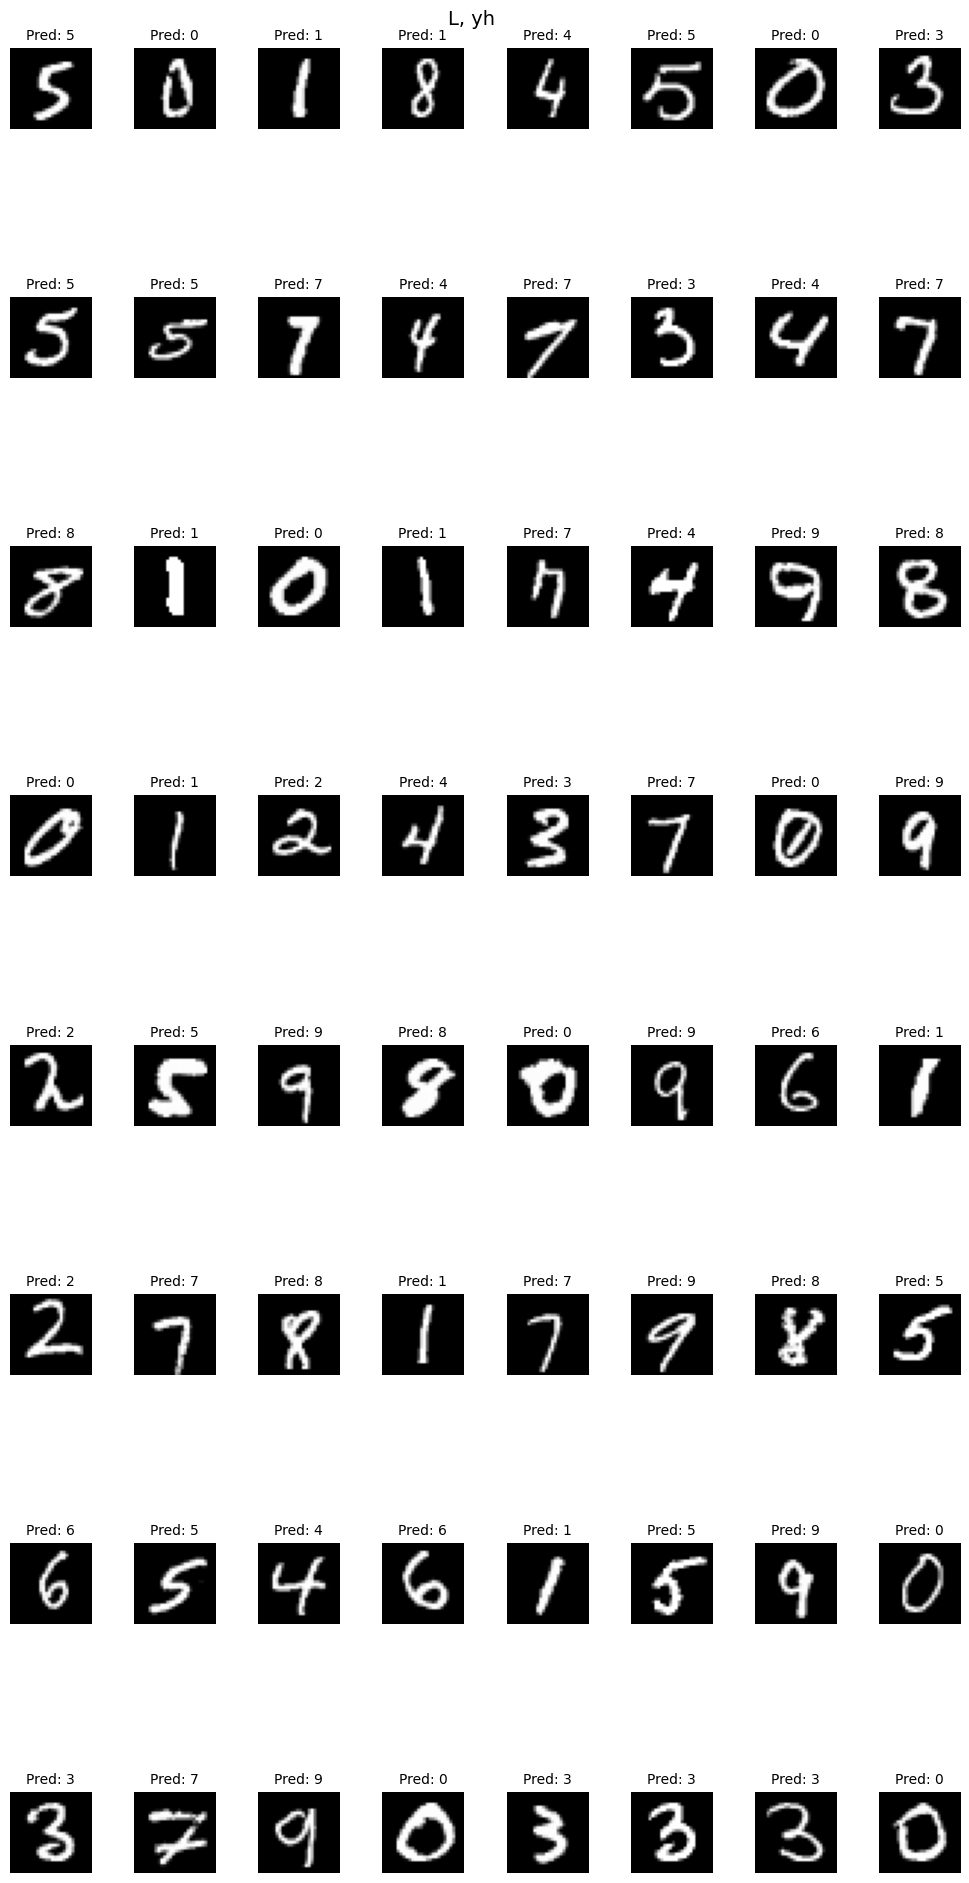

In [55]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)  

m, n = test_df.shape  # Assuming test_data is a DataFrame (X_test)

fig, axes = plt.subplots(8, 8, figsize=(10, 20))  # Increase figsize for better visibility  
fig.tight_layout(pad=0.5)  # Adjust padding for better spacing between subplots  

for i, ax in enumerate(axes.flat):  
    # Select random indices  
    random_index = np.random.randint(m)
    
    # Select rows corresponding to the random indices and reshape the image  
    X_random_reshaped = np.array(test_df.iloc[random_index]).reshape((28, 28))  # No need to transpose 
    
    # Display the image  
    ax.imshow(X_random_reshaped, cmap='gray')  
    
    # Predict using the Neural Network
    X_input = np.array(test_df.iloc[random_index]).reshape((1, 28, 28, 1))  # Reshape to (1, 28, 28, 1)
    X_input = X_input / 255.0  # Normalize if necessary (if your model expects normalized input)
    
    prediction = model_convo.predict(X_input)  # Directly predict without additional list brackets
    prediction_p = tf.nn.softmax(prediction).numpy()  # Convert to numpy array (if logits are used)

    yhat = np.argmax(prediction_p)  # Get the predicted class

    # Display the label above the image  
    ax.set_title(f"Pred: {yhat}", fontsize=10)  
    ax.set_axis_off()  

fig.suptitle("L, yh", fontsize=14)  
plt.show()


<a></a>
## when we seprately train the convo model on full data wu got an accuracy of 98.88% aproxx